In [1]:
# ============================================
#   LIGHT-DRAG EXPERIMENT DATA & FIGURES
#   (October 2025 - Compact and commented)
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.optimize import curve_fit
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple

# 1.  MOVING PROBE FRAME

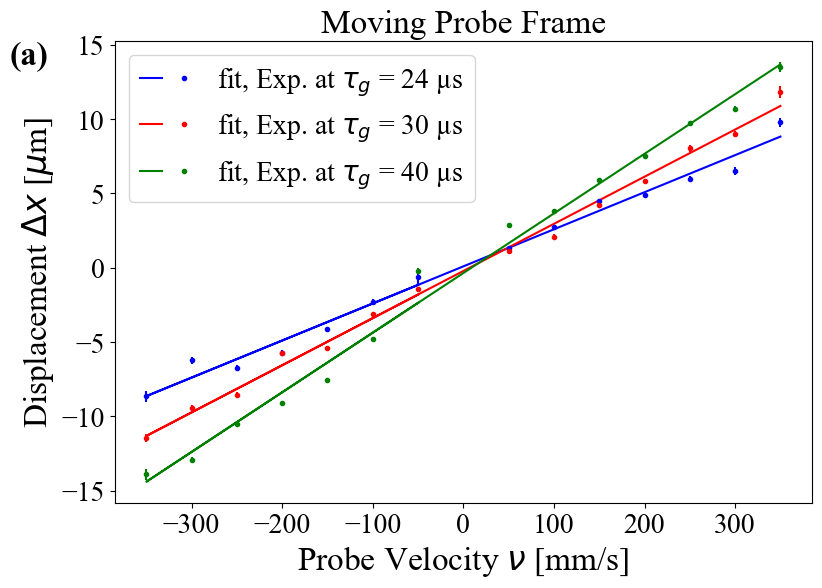

In [3]:
# This section plots the measured and fitted displacement Δx
# versus probe velocity (ν) for three different group delays (τ_g).
# Experimental probe velocities (mm/s)
lista_all_vel = [-50, -100, -150, -200, -250, -300, -350,
                  50,  100,  150,  200,  250,  300,  350]

# --- Experimental data for τ_g = 24 μs ---
lista_drag_both_24us = [-0.619, -2.318, -4.154, -5.711, -6.751, -6.223, -8.651,
                         1.298,  2.750,  4.500,  4.908,  5.973,  6.487,  9.774]
std_error_diff_lr_24us = [0.495, 0.203, 0.148, 0.170, 0.174, 0.247, 0.357,
                          0.182, 0.133, 0.135, 0.142, 0.207, 0.280, 0.308]
slope_24us = 0.02495
intercept_24us = 0.09026

# --- Experimental data for τ_g = 30 μs ---
lista_drag_both_30us = [-1.458, -3.108, -5.431, -5.744, -8.543, -9.420, -11.437,
                         1.147,  2.085,  4.193,  5.808,  8.023,  8.979,  11.825]
std_error_diff_lr_30us = [0.133, 0.146, 0.160, 0.169, 0.162, 0.187, 0.262,
                          0.143, 0.161, 0.148, 0.141, 0.222, 0.203, 0.419]
slope_30us = 0.03172
intercept_30us = -0.2201

# --- Experimental data for τ_g = 40 μs ---
lista_drag_both_40us = [-0.221, -4.801, -7.536, -9.113, -10.499, -12.916, -13.911,
                         2.847,  3.785,  5.893,  7.508,  9.723,  10.679,  13.525]
std_error_diff_lr_40us = [0.179, 0.136, 0.134, 0.150, 0.167, 0.185, 0.361,
                          0.129, 0.144, 0.136, 0.162, 0.178, 0.204, 0.335]
slope_40us = 0.04012
intercept_40us = -0.3597

# Set font globally
plt.rc('font', family='Times New Roman')

plt.figure(figsize=(9, 6))

# Plot experimental data and linear fits for three τ_g values
plt.errorbar(lista_all_vel, lista_drag_both_24us, yerr=std_error_diff_lr_24us,
             fmt='.', color='b', label='Exp. at $\\tau_g$ = 24 µs')
plt.plot(lista_all_vel, slope_24us * np.array(lista_all_vel) + intercept_24us, color='b')

plt.errorbar(lista_all_vel, lista_drag_both_30us, yerr=std_error_diff_lr_30us,
             fmt='.', color='r', label='Exp. at $\\tau_g$ = 30 µs')
plt.plot(lista_all_vel, slope_30us * np.array(lista_all_vel) + intercept_30us, color='r')

plt.errorbar(lista_all_vel, lista_drag_both_40us, yerr=std_error_diff_lr_40us,
             fmt='.', color='green', label='Exp. at $\\tau_g$ = 40 µs')
plt.plot(lista_all_vel, slope_40us * np.array(lista_all_vel) + intercept_40us, color='green')

# Plot formatting
plt.title('Moving Probe Frame', fontsize=24)
plt.xlabel('Probe Velocity $\\nu$ [mm/s]', fontsize=24)
plt.ylabel('Displacement $\\Delta x$ [$\\mu$m]', fontsize=24)
plt.tick_params(axis='both', labelsize=20)
plt.text(-0.15, 1.0, '(a)', transform=plt.gca().transAxes,
         fontsize=24, fontweight='bold', va='top', ha='left')

# Custom combined legend (fit + experimental)
legend_elements = [
    (Line2D([0], [0], color='b', linestyle='-'),
     Line2D([0], [0], color='b', marker='.', linestyle='None')),
    (Line2D([0], [0], color='r', linestyle='-'),
     Line2D([0], [0], color='r', marker='.', linestyle='None')),
    (Line2D([0], [0], color='green', linestyle='-'),
     Line2D([0], [0], color='green', marker='.', linestyle='None'))
]
plt.legend(handles=[(l1, l2) for l1, l2 in legend_elements],
           labels=['fit, Exp. at $\\tau_g$ = 24 µs',
                   'fit, Exp. at $\\tau_g$ = 30 µs',
                   'fit, Exp. at $\\tau_g$ = 40 µs'],
           handler_map={tuple: HandlerTuple(ndivide=None)},
           fontsize=20, loc='upper left')
plt.show()

# 2.  MOVING MEDIUM FRAME

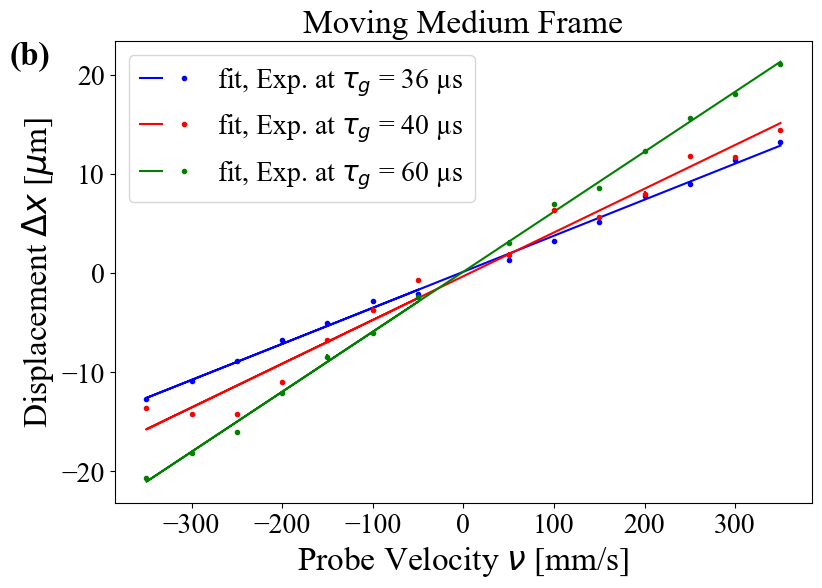

In [4]:
# This plot compares experimental displacement Δx versus probe velocity ν
# for three different group delays (τ_g = 36, 40, 60 μs).

# --- Experimental data for τ_g = 36 μs ---
lista_drag_both_36us = [
    -2.1663, -2.8075, -5.0914, -6.8018, -8.8979, -10.9297, -12.7411,
     1.3125,  3.2556,  5.1490,  7.7694,  8.9212, 11.3374, 13.2435
]
std_error_diff_lr_36us = [
    0.1229, 0.0760, 0.0729, 0.0870, 0.0844, 0.0875, 0.1046,
    0.1666, 0.0956, 0.0800, 0.2854, 0.0922, 0.0755, 0.1102
]
slope_36us = 0.03637
intercept_36us = 0.11092

# --- Experimental data for τ_g = 40 μs ---
lista_drag_both_40us = [
    -0.7020, -3.7235, -6.7295, -11.0305, -14.2281, -14.2660, -13.6347,
     1.8370,  6.2949,  5.6804,   7.9148,  11.7552,  11.6832,  14.4508
]
std_error_diff_lr_40us = [
    0.2014, 0.3263, 0.1092, 0.0812, 0.1237, 0.1528, 0.1545,
    0.2421, 0.1125, 0.0922, 0.3770, 0.1023, 0.1241, 0.1519
]
slope_40us = 0.04413
intercept_40us = -0.33557

# --- Experimental data for τ_g = 60 μs ---
lista_drag_both_60us = [
    -2.4617, -6.0481, -8.4379, -12.1270, -16.0077, -18.1530, -20.6705,
     3.0531,  6.8982,  8.5982,  12.2942,  15.6065,  18.0368,  21.0459
]
std_error_diff_lr_60us = [
    0.2469, 0.1494, 0.2254, 0.2196, 0.1450, 0.1464, 0.1319,
    0.2220, 0.1934, 0.1230, 0.1556, 0.1507, 0.1470, 0.2022
]
slope_60us = 0.06053
intercept_60us = 0.11622

# --- Plot (same style as Moving Probe Frame) ---
plt.figure(figsize=(9, 6))

# Plot experimental data and linear fits for τ_g = 36, 40, 60 μs
plt.errorbar(lista_all_vel, lista_drag_both_36us, yerr=std_error_diff_lr_36us,
             fmt='.', color='b', label='Exp. at $\\tau_g$ = 36 µs')
plt.plot(lista_all_vel, slope_36us * np.array(lista_all_vel) + intercept_36us, color='b')

plt.errorbar(lista_all_vel, lista_drag_both_40us, yerr=std_error_diff_lr_40us,
             fmt='.', color='r', label='Exp. at $\\tau_g$ = 40 µs')
plt.plot(lista_all_vel, slope_40us * np.array(lista_all_vel) + intercept_40us, color='r')

plt.errorbar(lista_all_vel, lista_drag_both_60us, yerr=std_error_diff_lr_60us,
             fmt='.', color='green', label='Exp. at $\\tau_g$ = 60 µs')
plt.plot(lista_all_vel, slope_60us * np.array(lista_all_vel) + intercept_60us, color='green')

# Plot formatting
plt.title('Moving Medium Frame', fontsize=24)
plt.xlabel('Probe Velocity $\\nu$ [mm/s]', fontsize=24)
plt.ylabel('Displacement $\\Delta x$ [$\\mu$m]', fontsize=24)
plt.tick_params(axis='both', labelsize=20)
plt.text(-0.15, 1.0, '(b)', transform=plt.gca().transAxes,
         fontsize=24, fontweight='bold', va='top', ha='left')

# Custom legend with fit + experimental markers
legend_elements = [
    (Line2D([0], [0], color='b', linestyle='-'),
     Line2D([0], [0], color='b', marker='.', linestyle='None')),
    (Line2D([0], [0], color='r', linestyle='-'),
     Line2D([0], [0], color='r', marker='.', linestyle='None')),
    (Line2D([0], [0], color='green', linestyle='-'),
     Line2D([0], [0], color='green', marker='.', linestyle='None'))
]
plt.legend(handles=[(l1, l2) for l1, l2 in legend_elements],
           labels=['fit, Exp. at $\\tau_g$ = 36 µs',
                   'fit, Exp. at $\\tau_g$ = 40 µs',
                   'fit, Exp. at $\\tau_g$ = 60 µs'],
           handler_map={tuple: HandlerTuple(ndivide=None)},
           fontsize=20, loc='upper left')
plt.show()


# 3.  TIME-DELAY MEASUREMENT (τ_g = 24 µs and 40 µs)

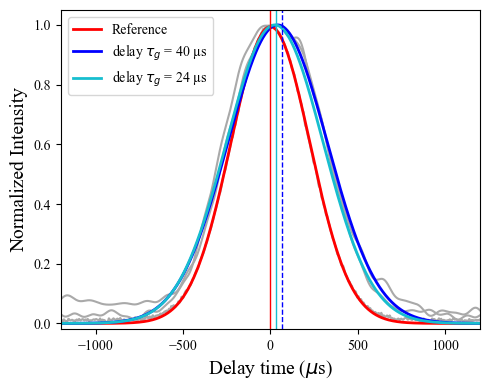

In [5]:
# This section reads the time-domain data from .csv files,
# applies frequency-domain filtering, fits Gaussian envelopes,
# and plots the delay between reference and slow-light pulses.

# === Define Gaussian and frequency filter ===
def gaussian(x, A, x0, sigma):
    """Return a Gaussian profile with amplitude A, center x0, and width sigma."""
    return A * np.exp(-(x - x0)**2 / (2 * sigma**2))

def frequency_filter(freqs, cutoff):
    """Simple high-frequency cutoff filter."""
    return np.where(np.abs(freqs) > cutoff, 0, 1)

# === Function to process each dataset ===
def process_dataset(filename, skip_header, skip_footer):
    """
    Reads (base, delay, pulse) columns from CSV, normalizes signals,
    applies frequency filters, performs Gaussian fits, and returns
    processed arrays ready for plotting.
    """
    data = np.genfromtxt(filename, skip_header=skip_header,
                         skip_footer=skip_footer, delimiter=',')
    base, delay, pulse = [data[:, i] for i in range(3)]

    # Normalize signals between 0 and 1
    delay_norm = (delay - delay.min()) / (delay.max() - delay.min())
    pulse_norm = (pulse - pulse.min()) / (pulse.max() - pulse.min())

    # Fourier transform and filtering
    pulse_fft, delay_fft = fft(pulse_norm), fft(delay_norm)
    sampling_freq = 1 / (base[1] - base[0])
    freqs = np.fft.fftfreq(len(base), d=1 / sampling_freq)

    delay_filtered = np.real(ifft(delay_fft * frequency_filter(freqs, 1e4)))
    pulse_filtered = np.real(ifft(pulse_fft * frequency_filter(freqs, 8.5e4)))

    # Normalize filtered signals
    delay_filt_norm = (delay_filtered - delay_filtered.min()) / (delay_filtered.max() - delay_filtered.min())
    pulse_filt_norm = (pulse_filtered - pulse_filtered.min()) / (pulse_filtered.max() - pulse_filtered.min())

    # Gaussian fits
    popt_delay, _ = curve_fit(gaussian, base, delay_filt_norm, p0=[1, np.mean(base), np.std(base)])
    popt_pulse, _ = curve_fit(gaussian, base, pulse_filt_norm, p0=[1, np.mean(base), np.std(base)])

    # Compute in microseconds
    x_us = 1e6 * base
    peak_delay = 1e6 * popt_delay[1]
    peak_pulse = 1e6 * popt_pulse[1]

    delay_fit_norm = gaussian(base, *popt_delay)
    delay_fit_norm = (delay_fit_norm - delay_fit_norm.min()) / (delay_fit_norm.max() - delay_fit_norm.min())
    gaussian_pulse = gaussian(base, *popt_pulse)

    return dict(x_us=x_us,
                pulse_filtered=pulse_filt_norm,
                delay_filtered=delay_filt_norm,
                gaussian_pulse=gaussian_pulse,
                delay_fit=delay_fit_norm,
                peak_delay=peak_delay,
                peak_pulse=peak_pulse)

# === Process both CSV datasets ===
setA = process_dataset('2024-07-03 delay-4.csv', skip_header=12, skip_footer=2)
setB = process_dataset('2024-06-30 delay-8.csv', skip_header=4, skip_footer=2)

# === Plot reference and slow-light pulses ===
plt.figure(figsize=(5, 4))
plt.plot(setA["x_us"] - 165, setA["pulse_filtered"], color='darkgrey')
plt.plot(setA["x_us"] - 165, setA["delay_filtered"], '-', color='darkgrey')
plt.plot(setB["x_us"] - 205, setB["delay_filtered"], '-', color='darkgrey')

plt.plot(setA["x_us"] - 165, setA["gaussian_pulse"], '-', color='r', label='Reference', linewidth=2)
plt.plot(setA["x_us"] - 165, setA["delay_fit"], '-', color='b', label='delay $\\tau_g$ = 40 µs', linewidth=2)
plt.plot(setB["x_us"] - 205, setB["delay_fit"], '-', color='C9', label='delay $\\tau_g$ = 24 µs', linewidth=2)

# Centroid markers
plt.axvline(x=setA["peak_delay"] - 140, linestyle='--', color='b', lw=1)
plt.axvline(x=setA["peak_pulse"] - 165, color='r', lw=1)
plt.axvline(x=setA["peak_pulse"] - 130, color='C9', lw=1)

plt.xlim(-1200, 1200)
plt.ylim(-0.02, 1.05)
plt.legend(loc='upper left')
plt.xlabel('Delay time ($\\mu$s)', fontsize=14)
plt.ylabel('Normalized Intensity', fontsize=14)
plt.tight_layout()
plt.show()

# 4.  BEAM PROFILE (EIT on/off comparison)

Average centroid (EIT off): 886.09
Average centroid (EIT on):  931.72
Displacement (pixels): 45.63


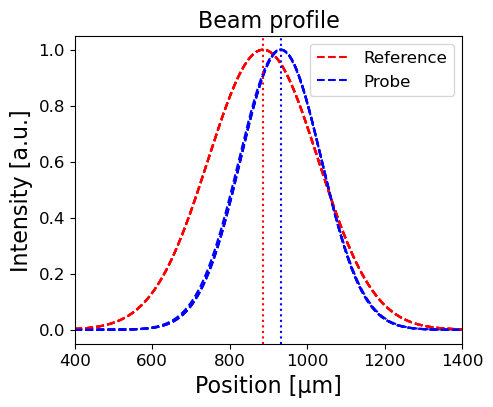

Average peak difference: 45.60 µm


In [2]:
# This section loads images for EIT-on and EIT-off cases,
# fits the transverse beam profile with Gaussians, and compares
# the average displacement between the two conditions.

def gaussian(x, a, x0, sigma):
    """1D Gaussian used for spatial beam profile fitting."""
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))


# path_off = 'data/EIT_off/EIToff_350_{0}.bmp'
# path_on  = 'data/EIT_on/EITon_350_{0}.bmp'


fitoff1, fiton1, popt_x11, popt_x21 = {}, {}, {}, {}

for i in range(5):
    # --- EIT OFF ---
    img_off = plt.imread(path_off.format(i + 1))
    x1 = np.arange(img_off.shape[1])
    intensity1 = np.sum(img_off, axis=0)
    norm1 = (intensity1 - intensity1.min()) / (intensity1.max() - intensity1.min())
    centroid1 = np.sum(x1 * intensity1) / np.sum(intensity1)
    fitoff1[i + 1] = {"x1": x1, "x1_intensity_normalized": norm1}
    popt_x11[i + 1] = {"gauss1": curve_fit(gaussian, x1, norm1,
                                           p0=[np.max(norm1), centroid1, 1])[0]}

    # --- EIT ON ---
    img_on = plt.imread(path_on.format(i + 1))
    x2 = np.arange(img_on.shape[1])
    intensity2 = np.sum(img_on, axis=0)
    norm2 = (intensity2 - intensity2.min()) / (intensity2.max() - intensity2.min())
    centroid2 = np.sum(x2 * intensity2) / np.sum(intensity2)
    fiton1[i + 1] = {"x2": x2, "x2_intensity_normalized": norm2}
    popt_x21[i + 1] = {"gauss2": curve_fit(gaussian, x2, norm2,
                                           p0=[np.max(norm2), centroid2, 1])[0]}

# Compute mean centroids (in pixels)
averagex = np.mean([popt_x11[i + 1]["gauss1"][1] for i in range(5)])
averagex2 = np.mean([popt_x21[i + 1]["gauss2"][1] for i in range(5)])
print(f'Average centroid (EIT off): {averagex:.2f}')
print(f'Average centroid (EIT on):  {averagex2:.2f}')
print(f'Displacement (pixels): {(averagex2 - averagex):.2f}')

# --- Plot averaged beam profiles ---
plt.figure(figsize=(5, 4))
pixel_size = 1  # micron per pixel (adjust if calibrated)
shift_microns = 0

peak_diff_microns = []
for i in range(5):
    y1 = gaussian(fitoff1[i + 1]["x1"], *popt_x11[i + 1]["gauss1"])
    y1 /= np.max(y1)
    y2 = gaussian(fiton1[i + 1]["x2"], *popt_x21[i + 1]["gauss2"])
    y2 /= np.max(y2)

    x1_microns = fitoff1[i + 1]["x1"] * pixel_size
    x2_microns = fiton1[i + 1]["x2"] * pixel_size - shift_microns

    plt.plot(x1_microns, y1, color='red', linestyle='--')
    plt.plot(x2_microns, y2, color='blue', linestyle='--')

    # Peak difference
    peak_x1 = x1_microns[np.argmax(y1)]
    peak_x2 = x2_microns[np.argmax(y2)]
    peak_diff_microns.append(abs(peak_x1 - peak_x2))

plt.title('Beam profile', fontsize=16)
plt.xlabel('Position [µm]', fontsize=16)
plt.ylabel('Intensity [a.u.]', fontsize=16)
plt.xlim(400 * pixel_size, 1400 * pixel_size)
plt.tick_params(axis='both', labelsize=12)
plt.axvline(averagex * pixel_size, linestyle=':', color='r')
plt.axvline(averagex2 * pixel_size - shift_microns, linestyle=':', color='b')
plt.legend(['Reference', 'Probe'], fontsize=12)
plt.show()

average_peak_diff = np.mean(peak_diff_microns)
print(f'Average peak difference: {average_peak_diff:.2f} µm')